In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import *

In [7]:
os.getcwd()

'/home/anthony/420/notebooks'

In [8]:
os.makedirs('plots', exist_ok=True)

In [2]:
df = pd.read_csv('../scripts/results_summary.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4536 entries, ce2406bc88ceda4e2fde96bf96fdd2d5 to 9591fefef4086cbf060bc6afdcee4eba
Columns: 225 entries, activation_func to std_n_epochs
dtypes: bool(1), float64(219), int64(2), object(3)
memory usage: 7.8+ MB


In [3]:
## get rid of 535 + classification results since they are invalid
df = df[~(get_535_mask(df) & classification_mask(df))] 

In [4]:
## Normalise regression scores to get them into the same range as the classification scores.
val_scores_cols = get_val_scores_cols(df)
train_scores_cols = get_train_scores_cols(df)
scores_cols = np.hstack((val_scores_cols, train_scores_cols))

x = df[regression_mask(df)][scores_cols]
x_min, x_max = -1.0, 1.0 # the range of Pearson's correlation coefficient

x = (x - x_min) / (x_max - x_min)

df.loc[regression_mask(df), scores_cols] = x
df.loc[regression_mask(df), scores_cols].describe()

,val_scores_00,val_scores_01,val_scores_02,val_scores_03,val_scores_04,val_scores_05,val_scores_06,val_scores_07,val_scores_08,val_scores_09,...,train_scores_30,train_scores_31,train_scores_32,train_scores_33,train_scores_34,train_scores_35,train_scores_36,train_scores_37,train_scores_38,train_scores_39
count,640.000000,645.000000,645.000000,640.000000,642.000000,643.000000,643.000000,642.000000,640.000000,643.000000,...,1816.000000,1822.000000,1818.000000,1817.000000,1814.000000,1817.000000,1816.000000,1818.000000,1820.000000,1808.000000
mean,0.879092,0.875410,0.876045,0.880273,0.881025,0.876497,0.879895,0.874846,0.876116,0.878513,...,0.787203,0.782600,0.781607,0.784049,0.777483,0.786392,0.784100,0.781584,0.783219,0.787332
std,0.124107,0.129386,0.125915,0.124530,0.120906,0.123394,0.119610,0.127906,0.130114,0.121386,...,0.200958,0.200359,0.201337,0.200873,0.207605,0.196276,0.200675,0.200602,0.202662,0.198761
min,0.341129,0.450070,0.456429,0.415378,0.371529,0.447194,0.434309,0.341147,0.292694,0.427145,...,0.000000,0.179230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000
25%,0.847559,0.847339,0.847423,0.847529,0.848244,0.846745,0.845477,0.848407,0.846923,0.847314,...,0.587241,0.561959,0.558304,0.578730,0.538328,0.584320,0.569287,0.564171,0.567057,0.595841
50%,0.906456,0.914787,0.902782,0.907334,0.910376,0.902130,0.903469,0.903549,0.924490,0.902504,...,0.841112,0.828601,0.831767,0.835198,0.827473,0.837489,0.833508,0.828356,0.834006,0.837294
75%,0.968102,0.968806,0.968869,0.970098,0.967769,0.967110,0.969144,0.967702,0.967650,0.968740,...,0.974324,0.973626,0.973644,0.973689,0.973778,0.973296,0.973746,0.973470,0.973370,0.974102
max,0.995054,0.995418,0.995002,0.995048,0.995280,0.996138,0.995044,0.995027,0.995732,0.995345,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Sets

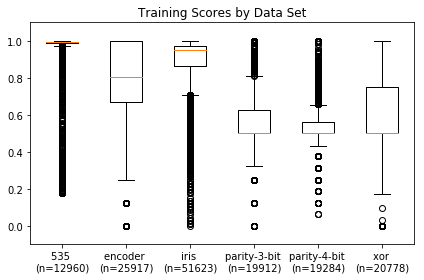

In [9]:
masks = (df['dataset'] == dataset for dataset in datasets)
labels = datasets

fig, ax = make_n_way_boxplot(df, True, 
                  masks, labels, 
                  'train_scores', 
                  'Training Scores by Data Set', double_plot=False)

ax.set_ylim(-0.1, 1.1)
fig.savefig('plots/training_scores_by_data_set.png')

In [12]:
print(df.groupby('dataset').median()['median_train_scores'].to_latex())

\begin{tabular}{lr}
\toprule
{} &  median\_train\_scores \\
dataset      &                      \\
\midrule
535          &             0.990033 \\
encoder      &             0.625000 \\
iris         &             0.943234 \\
parity-3-bit &             0.500000 \\
parity-4-bit &             0.500000 \\
xor          &             0.500000 \\
\bottomrule
\end{tabular}



# Adding Noise

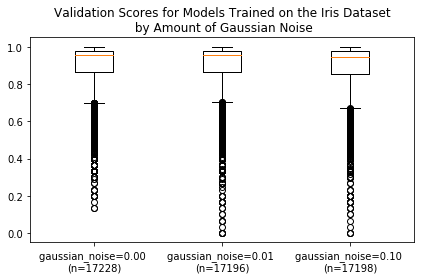

In [25]:
levels_of_noise = list(sorted(df['gaussian_noise'].unique()))

masks = [df['gaussian_noise'] == z for z in levels_of_noise]
labels = ['gaussian_noise=%.2f' % z for z in levels_of_noise]

fig, axes = make_n_way_boxplot(df, iris_mask(df), 
                             masks, labels, 
                             'val_scores', 
                             'Validation Scores for Models Trained on the Iris Dataset\n'
                             ' by Amount of Gaussian Noise', 
                             double_plot=False)
    
fig.savefig('plots/validation_scores_by_amount_of_gaussian_noise.png')

In [21]:
print(df.groupby('gaussian_noise').median()['median_val_scores'].to_latex())

\begin{tabular}{lr}
\toprule
{} &  median\_val\_scores \\
gaussian\_noise &                    \\
\midrule
0.00           &           0.942261 \\
0.01           &           0.939810 \\
0.10           &           0.933333 \\
\bottomrule
\end{tabular}



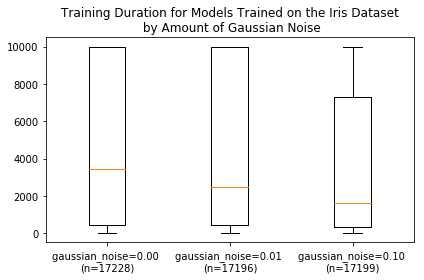

In [27]:
fig, axes = make_n_way_boxplot(df, iris_mask(df), 
                             masks, labels, 
                             'n_epochs', 
                             'Training Duration for Models Trained on the Iris Dataset\n'
                             ' by Amount of Gaussian Noise', 
                             double_plot=False)
    
fig.savefig('plots/training_duration_by_amount_of_gaussian_noise.png')

In [78]:
df_iris = df[iris_mask(df)]
n_epochs_cols = get_n_epochs_cols(df)

median_epochs = []

for z in levels_of_noise:
    median_epochs.append(df_iris.loc[(df['gaussian_noise'] == z), n_epochs_cols].median().median())
    
    
print(pd.DataFrame({'Gaussian Noise Standard Deviation': levels_of_noise, 
                    'Median Training Duration': median_epochs}).to_latex(index=False))

\begin{tabular}{rr}
\toprule
 Gaussian Noise Standard Deviation &  Median Training Duration \\
\midrule
                              0.00 &                   3488.00 \\
                              0.01 &                   2437.75 \\
                              0.10 &                   1610.25 \\
\bottomrule
\end{tabular}

